#### Decomposition

- 큰 하나의 행렬을 여러개의 작은 행렬로 분해
- 분해 과정에서 중요한 정보만 남게됨

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [3]:
def plot_iris(iris, labels):
    plt.figure()
    colors = ['navy','purple','red']
    for xy, label in zip(iris, labels):
        plt.scatter(xy[0], xy[1], color=colors[label])

In [4]:
def show_faces(faces):
    plt.figure()
    num_rows, num_cols = 2, 3
    for i in range(num_rows*num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(np.reshape(faces[i], (64,64)), cmap=plt.cm.gray)

In [5]:
iris.shape

(150, 4)

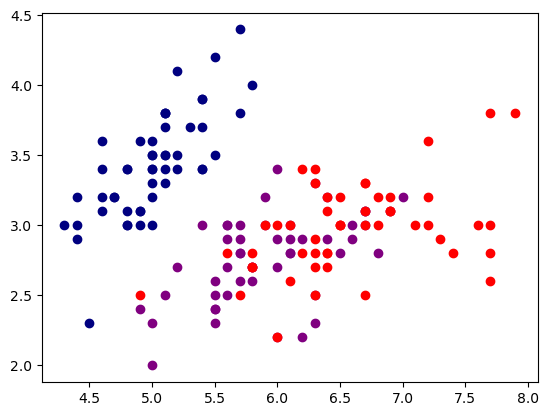

In [6]:
plot_iris(iris, labels)

In [7]:
faces.shape

(400, 4096)

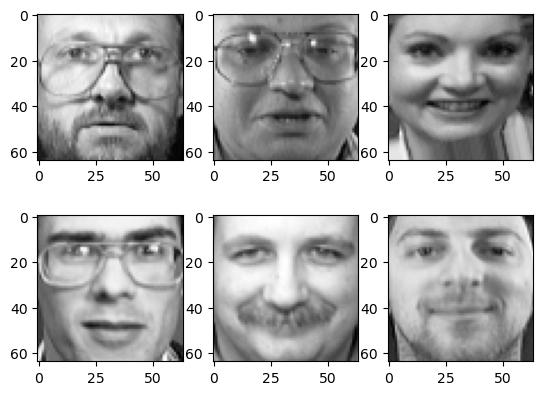

In [8]:
show_faces(faces)

#### Principal Component Analysis (PCA)

- PCA를 사용해 iris 데이터 변환
- 150 x 4 크기의 데이터를 150 x 2 크기의 행렬로 압축

In [9]:
model = PCA(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

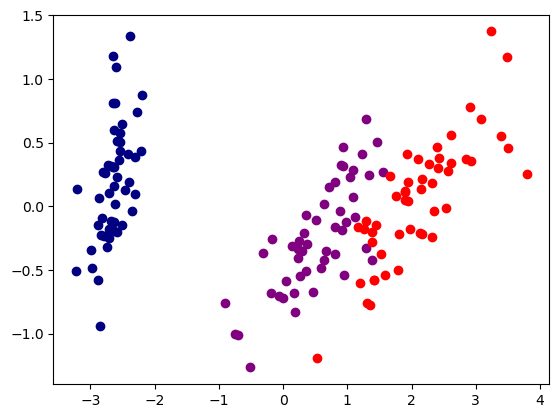

In [10]:
plot_iris(transformed_iris, labels)

In [11]:
faces.shape

(400, 4096)

In [12]:
model = PCA(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
faces_components.shape # 400 -> 6 으로 차원 축소

(6, 4096)

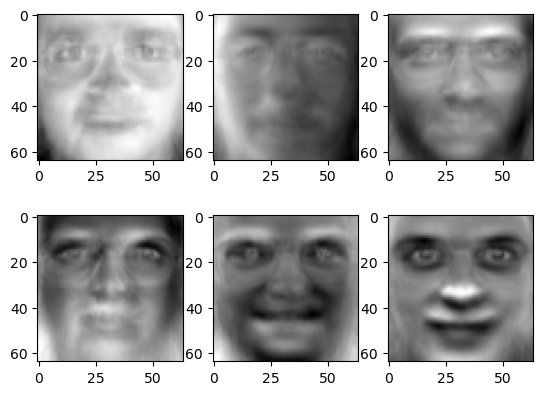

In [13]:
show_faces(faces_components) # 주요 얼굴의 특징들을 남겨놓고 나머지를 최소화

#### Incremental PCA

- PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야함
- Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
- 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용함

In [14]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

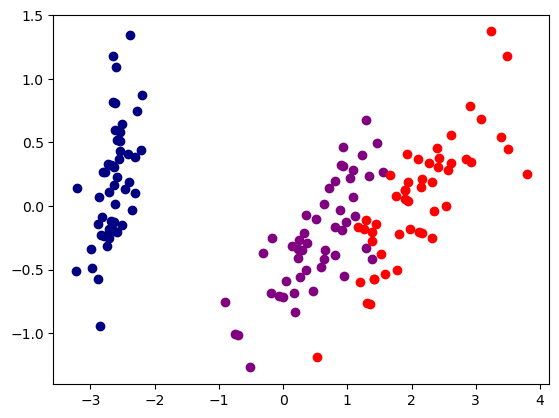

In [15]:
plot_iris(transformed_iris, labels)

In [16]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

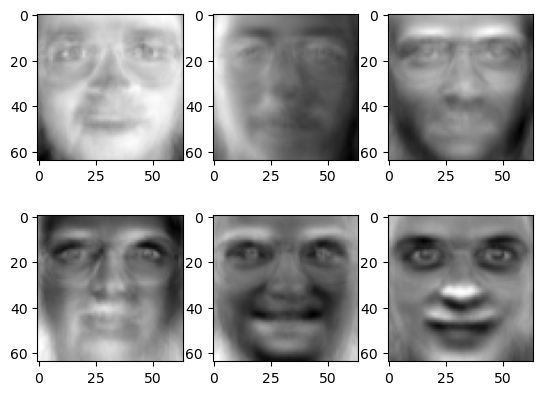

In [17]:
show_faces(faces_components)

#### Kernel PCA

- 차원 축소를 위한 복잡한 비선형 투형

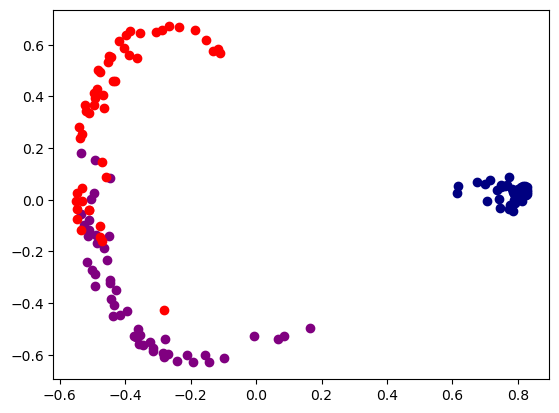

In [18]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

#### Sparse PCA

- PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점

- 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

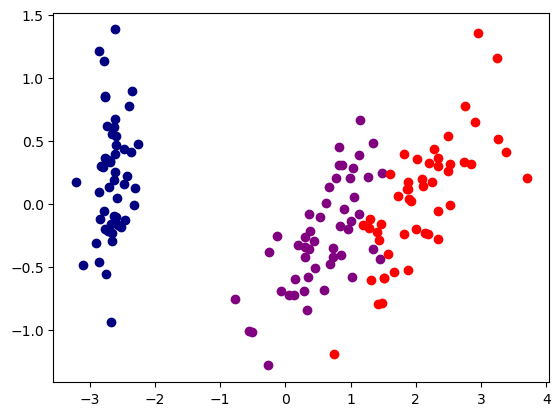

In [19]:
model = SparsePCA(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

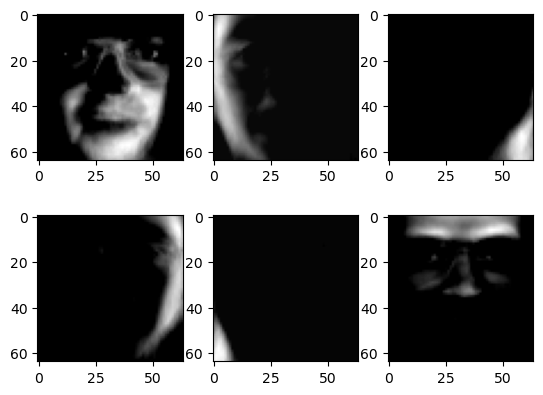

In [20]:
model = SparsePCA(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Truncated Sigular Decomposition (Truncated SVD)

- PCA는 정방행렬에 대해서만 행렬 분해 가능

- SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능

- PCA는 밀집 행렬 (Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변화도 가능

- 전체 크기에 대해 Full SVD를 사용하는 경우는 적음

- 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용함

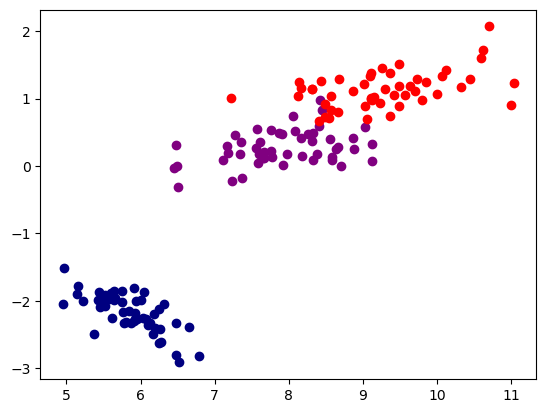

In [21]:
model = TruncatedSVD(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

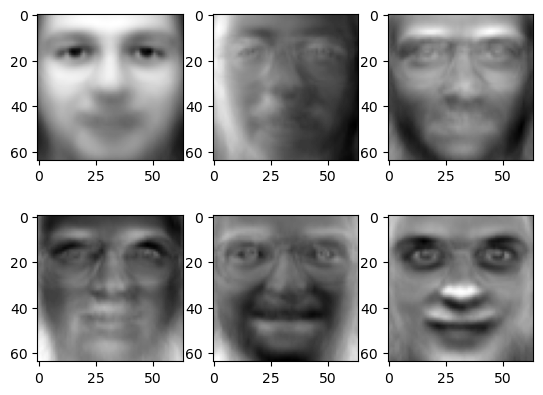

In [22]:
model = TruncatedSVD(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Dictionary Learning

- Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기

- Sparse coding은 overcomplete 기저벡터 (basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발

- 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

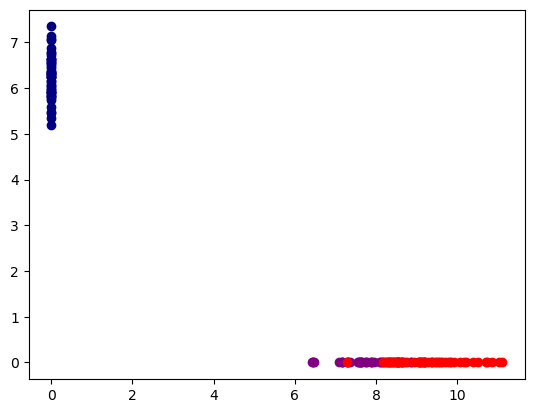

In [23]:
model = DictionaryLearning(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

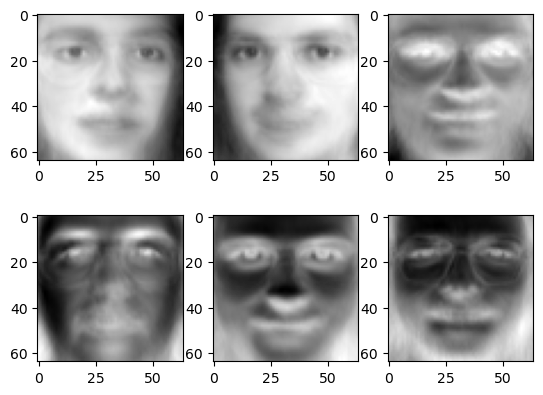

In [24]:
model = DictionaryLearning(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Factor Analysis

- 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법

- 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법

- PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려함

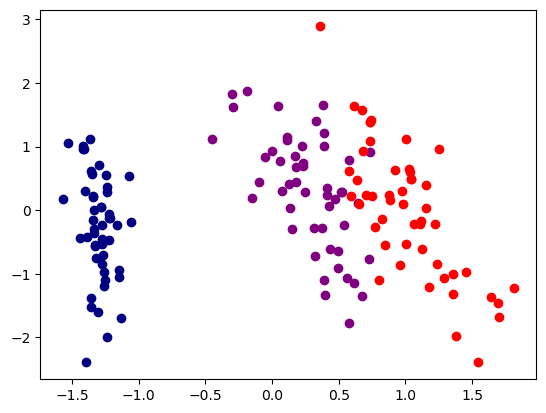

In [25]:
model = FactorAnalysis(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

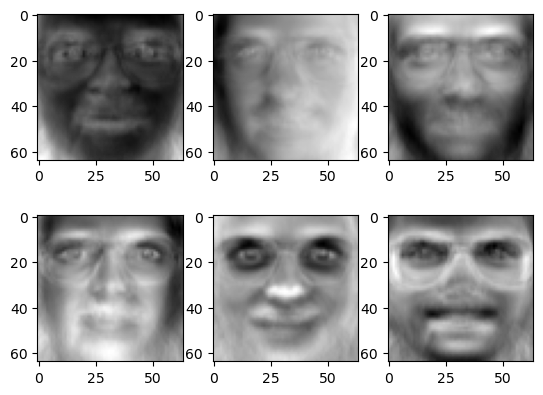

In [26]:
model = FactorAnalysis(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Independent Component Analysis(ICA)

- 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법

- ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명한느 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

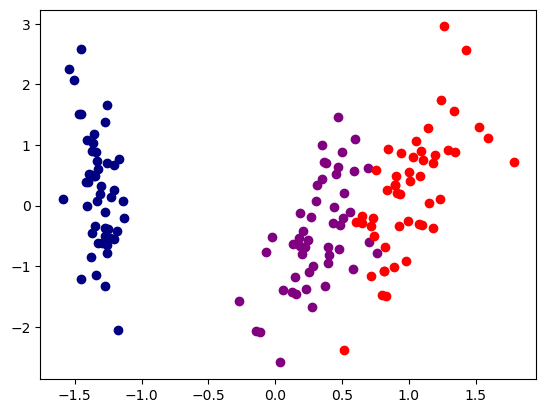

In [27]:
model = FastICA(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


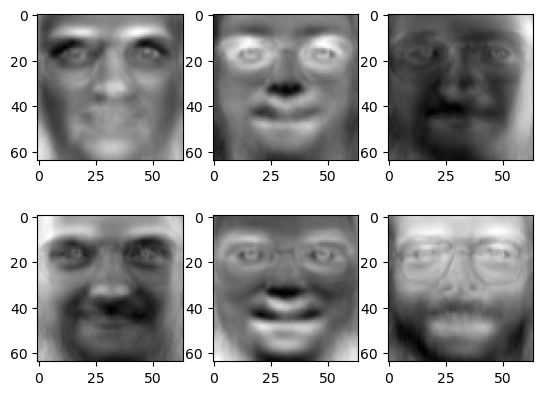

In [28]:
model = FastICA(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Non-negative Matrix Factorization

- 음수 미포함 행렬 분해(NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\decomposition\_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


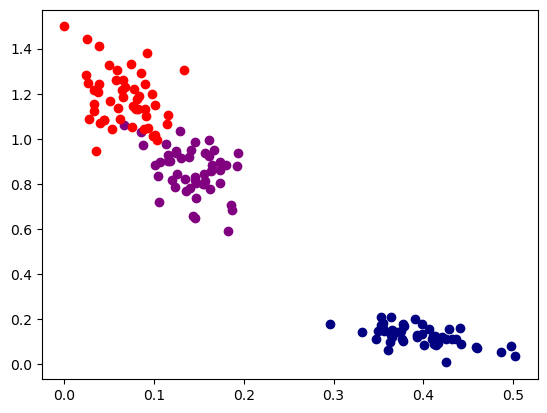

In [30]:
model = NMF(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

c:\Users\jjong\anaconda3\envs\jjong\Lib\site-packages\sklearn\decomposition\_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


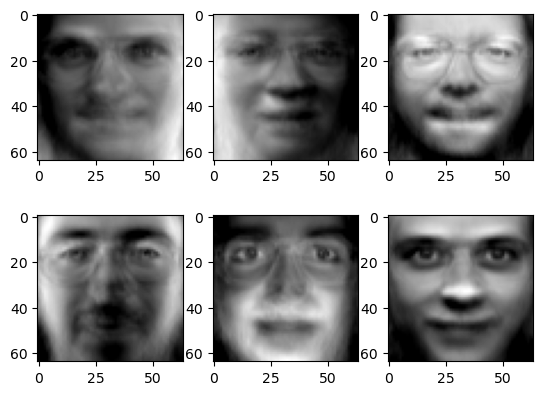

In [31]:
model = NMF(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Latent Dirichlet Allocation (LDA)

- 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형

- 디리클레 분포에 따라 잠재적인 의미 구조를 파악

    - 토픽 모델링에 많이 사용됨

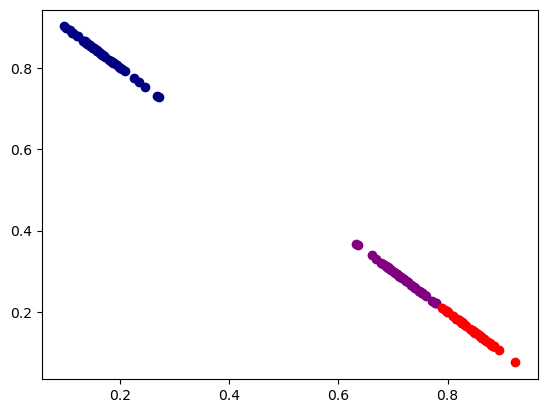

In [33]:
model = LatentDirichletAllocation(n_components=2, random_state=42)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

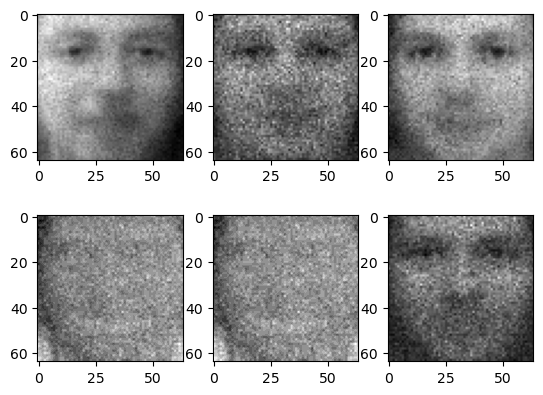

In [34]:
model = LatentDirichletAllocation(n_components=2*3, random_state=42)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

#### Linear Discriminant Analysis (LDA)

- LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
- LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함

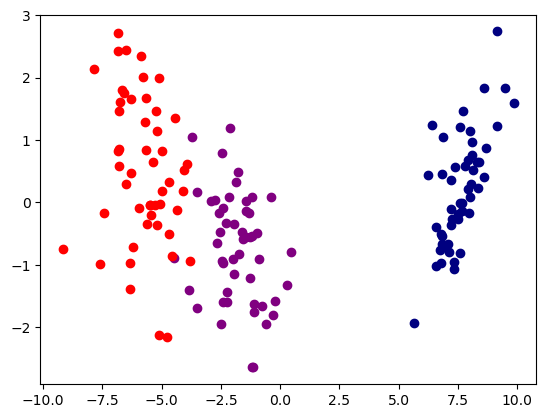

In [35]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

#### 압축된 표현을 사용한 학습

- 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [38]:
def min_max_scale(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [54]:
def plot_digits(digits, labels):
    digits = min_max_scale(digits)
    ax = plt.subplot(111, projection='3d')
    for i in range(digits.shape[0]):
        ax.text(digits[i,0], digits[i,1], digits[i,2], str(labels[i]), color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold','size':9})
    ax.view_init(4,-72)


In [55]:
digits = load_digits()

In [56]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

In [57]:
print(digits.data.shape)
print(decomposed_digits.shape)
print(decomposed_digits)

(1797, 64)
(1797, 3)
[[0.24499884 0.47817682 0.        ]
 [0.14365093 0.02509325 1.21364556]
 [0.19329149 0.14451199 0.90614854]
 ...
 [0.29648561 0.1754443  0.87928127]
 [0.22025862 0.61991333 0.15071765]
 [0.27961489 0.48855871 0.38918939]]


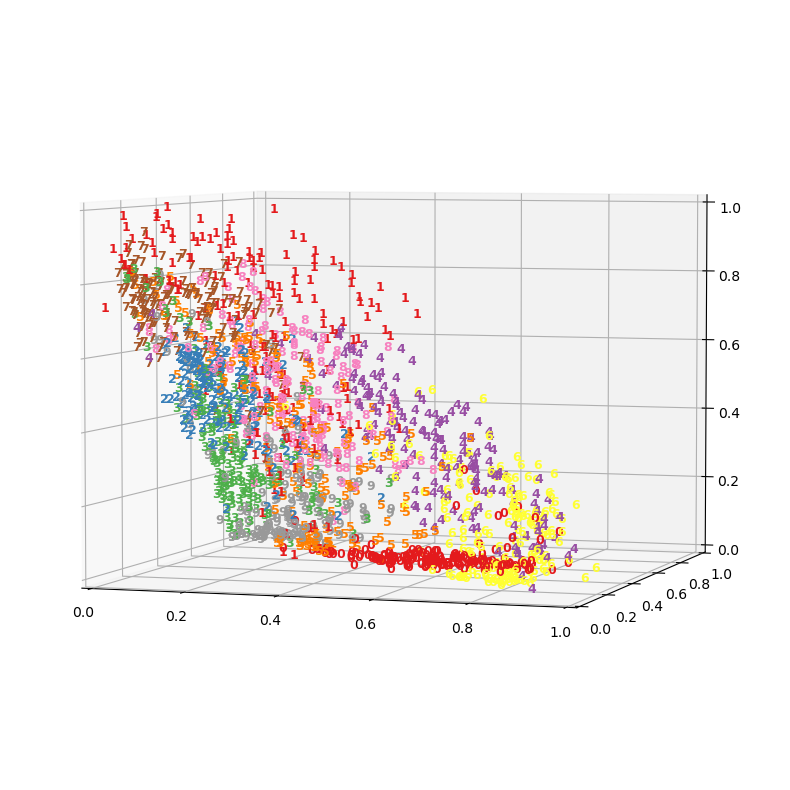

In [58]:
plt.figure(figsize=(20,10))
plot_digits(decomposed_digits, digits.target)

In [59]:
# KNN

knn = KNeighborsClassifier()

score = cross_val_score(
    estimator=knn,
    X=digits.data, y=digits.target,
    cv=5
)

score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [60]:
print(f'mean cross val score : {score.mean()} (+/- {score.std()})')

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


#### 복원된 표현을 사용한 학습

- 분해 후 복원된 행렬을 사용해 학습

In [61]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components
reconstructed_digits

array([[ 0.        ,  0.26167826,  5.04588308, ...,  9.30149378,
         2.317087  ,  0.28678502],
       [ 0.        ,  0.35809931,  4.50781117, ...,  2.29848044,
         1.27676563,  0.37428187],
       [ 0.        ,  0.33619912,  4.69291955, ...,  4.46161687,
         1.62120071,  0.35488549],
       ...,
       [ 0.        ,  0.34550309,  4.92539728, ...,  6.27229312,
         1.98979081,  0.36548448],
       [ 0.        ,  0.38200792,  7.06845753, ..., 10.71095322,
         2.83983712,  0.41640261],
       [ 0.        ,  0.37779065,  6.51607896, ...,  9.90894921,
         2.70360075,  0.4082094 ]])

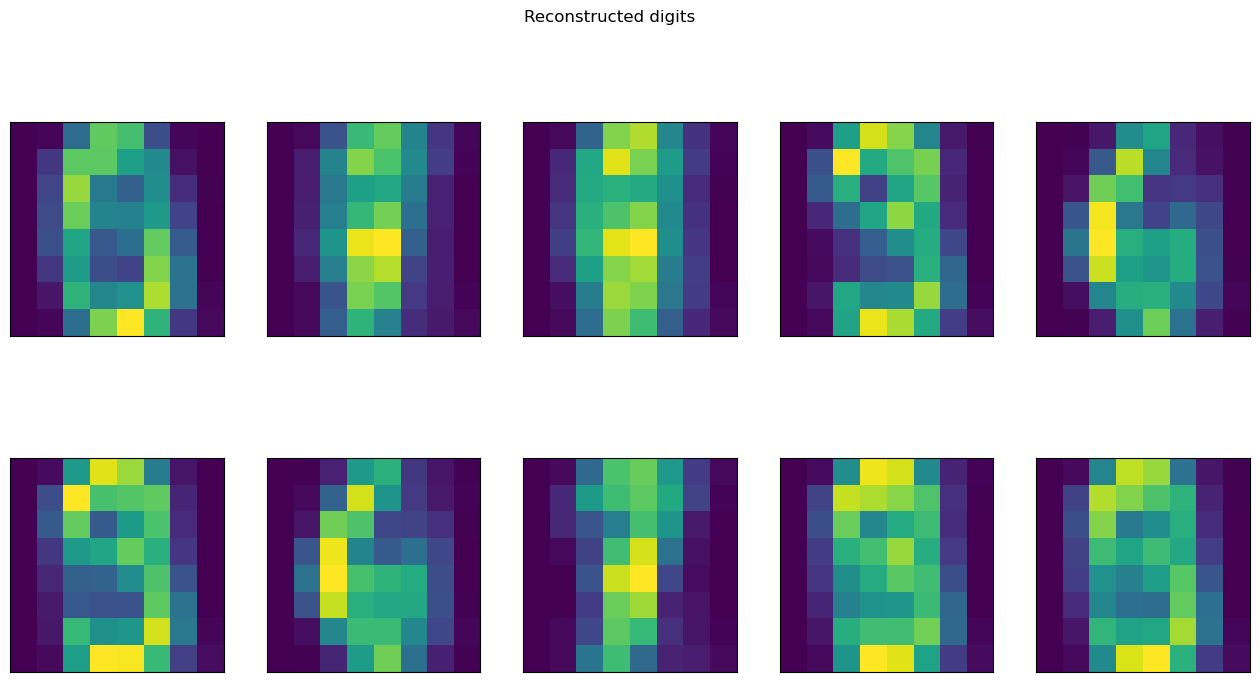

In [63]:
plt.figure(figsize=(16,8))
plt.suptitle('Reconstructed digits')

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8,8))